In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Задача
Аппроксимировать данные из набора 9 обучающих выборок,
сеть радиально-базисного вида,
обучить с помощью нормального уравнения,
центры задаются как независимая переменная 1,3,5,7,9

In [29]:
X = [-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
y = [-0.48, -0.78, -0.83, -0.67, -0.20, 0.70, 1.48, 1.17, 0.20]
cs = [-2.0, -1.0, 0.0, 1.0, 2.0]

In [30]:
import PerceptronRBF

In [31]:
perceptron = PerceptronRBF.Percept(cs=cs)  # create perceptron

In [32]:
perceptron.transform_fit(X, y)  # transform thetas and fit model
core_g1 = perceptron.core_g

[[ 2.01558771 -0.30430087 -1.29452523 -0.29227435  0.87182003  0.51047251
  -0.56981201 -0.58302875  0.60362736]
 [-2.33148576  1.27901789  2.35161933  0.15254399 -1.85354827 -0.87140357
   1.2566246   1.14684381 -1.27535582]
 [ 1.90378622 -1.47361683 -1.9635156   0.72898243  2.53674314  0.72898243
  -1.9635156  -1.47361683  1.90378622]
 [-1.27535582  1.14684381  1.2566246  -0.87140357 -1.85354827  0.15254399
   2.35161933  1.27901789 -2.33148576]
 [ 0.60362736 -0.58302875 -0.56981201  0.51047251  0.87182003 -0.29227435
  -1.29452523 -0.30430087  2.01558771]] 



In [33]:
y_predicted1 = [perceptron.predict(x) for x in X]  # doing predicting

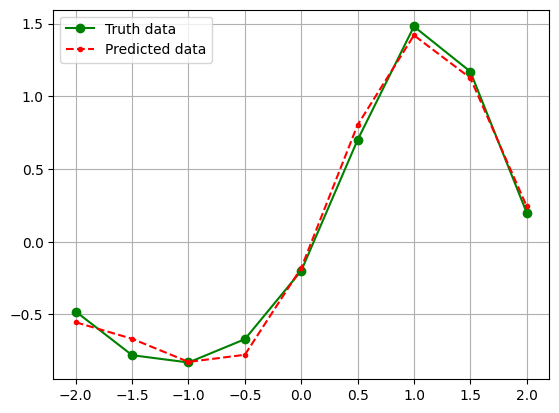

Mean Square Error = 0.06315185068223286


In [34]:
plt.plot(X, y, "go-")
plt.plot(X, y_predicted1, "r.--")
plt.grid(visible=True)
plt.legend(["Truth data", "Predicted data"])
plt.show()
print("Mean Square Error =", perceptron.mse_score)

## Пояснение:
Модель практически идеально повторяет аппрокимируемую функцию. Обучалась модель с помощью применения нормального уравнения.

# $$ \hat{\theta} = (G^{T} * G)^{-1} * G^{T} * y $$

***Предложения и замечания:***
- Увеличить количество скрытых нейронов, содержащие *базисные ядра Гаусса*, для улучшенной аппроксимации.
- По определению, радиально-базисная сеть должна в идеале иметь скрытых нейронов минимум столько же, сколько обучающих выборок.
- Одна из проблем сети -- это замедление работы с большим набором данных, по очевидным причинам.
- Существуют другие методы корректировки *центров* и *весов* в случае их случайной начальной инициализации.

**Ниже ради сравнения применяется сеть с большим количеством скрытых нейронов:**

In [35]:
cs = [-3.0, -2.8, -2.3, -1.9, -1.4, -0.8, -0.5, 0.0, 0.5, 0.8, 1.4, 1.9, 2.3, 2.8, 3.0]
perceptron = PerceptronRBF.Percept(cs=cs)

In [36]:
perceptron.transform_fit(X, y)
core_g2 = perceptron.core_g

[[-2.58472770e+04 -1.58577837e+04 -8.51349720e+03  1.68549028e+03
   1.98710392e+03  1.54490699e+04  2.50756509e+04  4.62835510e+04
   6.29707451e+04]
 [ 3.89952363e+04  2.36949980e+04  1.26250638e+04 -2.79334575e+03
  -3.48156941e+03 -2.32494146e+04 -3.82963171e+04 -7.04546396e+04
  -9.67997628e+04]
 [-2.54741583e+04 -1.51543555e+04 -7.30666148e+03  1.99323065e+03
   3.86837925e+03  1.51376291e+04  2.70447565e+04  4.89031744e+04
   6.92283102e+04]
 [ 1.51789191e+04  8.90866350e+03  3.26748673e+03 -9.94377200e+02
  -3.91555007e+03 -9.04829244e+03 -1.83947651e+04 -3.24887282e+04
  -4.73201927e+04]
 [-4.58849418e+03 -2.60704836e+03 -1.00331039e+02  1.18038578e+02
   2.38242837e+03  2.87177742e+03  7.42614516e+03  1.27743285e+04
   1.93123494e+04]
 [ 1.02581283e+03  3.05045315e+02 -6.15855375e+02 -3.51232639e+02
  -1.16753157e+03 -1.16804144e+03 -3.26701813e+03 -6.04982117e+03
  -9.52804581e+03]
 [-1.17692985e+02  2.87765697e+02  3.65318030e+02  6.20248145e+02
   2.40119688e+02  7.0751390

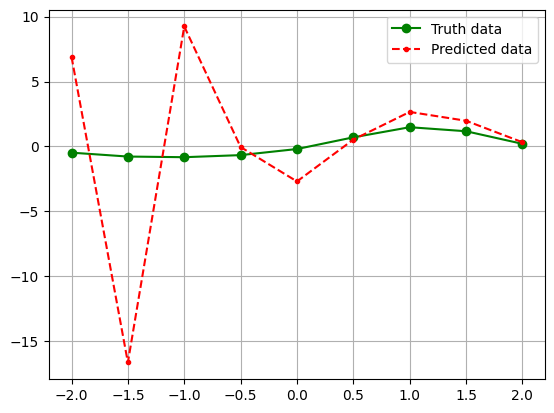

Mean Square Error = 4.302536619336904


In [37]:
y_predicted2 = [perceptron.predict(x) for x in X]  # doing predicting
plt.plot(X, y, "go-")
plt.plot(X, y_predicted2, "r.--")
plt.grid(visible=True)
plt.legend(["Truth data", "Predicted data"])
plt.show()
print("Mean Square Error =", perceptron.mse_score)

***ПРОВЕРКА СИНГУЛЯРНОГО РАЗЛОЖЕНИЯ***

# $$ \hat\theta = G^{+} * y $$
$$ G^{+} = V * \sigma * U^{-1} $$
$$ V => G*G^{*} $$
$$ U => G^{*}*G $$

In [38]:
X = [-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
y = [-0.48, -0.78, -0.83, -0.67, -0.20, 0.70, 1.48, 1.17, 0.20]
cs = [-2.0, -1.0, 0.0, 1.0, 2.0]

In [39]:
perceptron = PerceptronRBF.Percept(cs=cs)  # create perceptron
perceptron.transform_fit(X, y, is_singular=True)  # transform thetas and fit model
s_core_g1 = perceptron.core_g

[[ 2.01558771 -0.30430087 -1.29452523 -0.29227435  0.87182003  0.51047251
  -0.56981201 -0.58302875  0.60362736]
 [-2.33148576  1.27901789  2.35161933  0.15254399 -1.85354827 -0.87140357
   1.2566246   1.14684381 -1.27535582]
 [ 1.90378622 -1.47361683 -1.9635156   0.72898243  2.53674314  0.72898243
  -1.9635156  -1.47361683  1.90378622]
 [-1.27535582  1.14684381  1.2566246  -0.87140357 -1.85354827  0.15254399
   2.35161933  1.27901789 -2.33148576]
 [ 0.60362736 -0.58302875 -0.56981201  0.51047251  0.87182003 -0.29227435
  -1.29452523 -0.30430087  2.01558771]] 



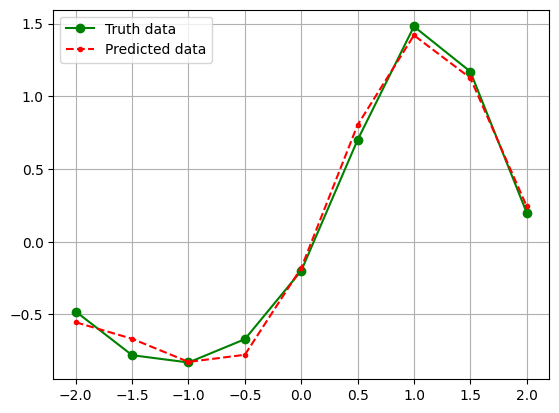

Mean Square Error = 0.06315185068223217


In [40]:
y_singular_predicted1 = [perceptron.predict(x) for x in X]  # doing predicting
plt.plot(X, y, "go-")
plt.plot(X, y_singular_predicted1, "r.--")
plt.grid(visible=True)
plt.legend(["Truth data", "Predicted data"])
plt.show()
print("Mean Square Error =", perceptron.mse_score)

**Сравним core_g1 и s_core_g1**

In [47]:
np.abs(core_g1) - np.abs(s_core_g1)

array([[ 3.28626015e-14, -2.77555756e-16,  1.59872116e-14,
         1.55431223e-15,  1.84297022e-14,  1.42108547e-14,
         3.10862447e-15,  3.77475828e-15,  1.14352972e-14],
       [ 4.92939023e-14, -5.99520433e-15,  2.17603713e-14,
         6.10622664e-15,  2.04281037e-14,  1.50990331e-14,
         8.21565038e-15,  8.65973959e-15,  9.32587341e-15],
       [ 4.50750548e-14, -9.10382880e-15,  1.88737914e-14,
        -1.27675648e-14,  1.19904087e-14,  1.06581410e-14,
         6.21724894e-15,  7.10542736e-15,  4.21884749e-15],
       [ 3.26405569e-14, -8.43769499e-15,  1.48769885e-14,
        -1.33226763e-14,  3.55271368e-15, -6.41153797e-15,
         3.99680289e-15,  3.99680289e-15,  4.44089210e-16],
       [ 1.64313008e-14, -3.55271368e-15,  8.54871729e-15,
        -9.65894031e-15,  6.66133815e-16, -3.49720253e-15,
         1.99840144e-15,  1.60982339e-15,  1.33226763e-15]])

In [42]:
core_g1

array([[ 2.01558771, -0.30430087, -1.29452523, -0.29227435,  0.87182003,
         0.51047251, -0.56981201, -0.58302875,  0.60362736],
       [-2.33148576,  1.27901789,  2.35161933,  0.15254399, -1.85354827,
        -0.87140357,  1.2566246 ,  1.14684381, -1.27535582],
       [ 1.90378622, -1.47361683, -1.9635156 ,  0.72898243,  2.53674314,
         0.72898243, -1.9635156 , -1.47361683,  1.90378622],
       [-1.27535582,  1.14684381,  1.2566246 , -0.87140357, -1.85354827,
         0.15254399,  2.35161933,  1.27901789, -2.33148576],
       [ 0.60362736, -0.58302875, -0.56981201,  0.51047251,  0.87182003,
        -0.29227435, -1.29452523, -0.30430087,  2.01558771]])

In [43]:
s_core_g1

array([[ 2.01558771, -0.30430087, -1.29452523, -0.29227435,  0.87182003,
         0.51047251, -0.56981201, -0.58302875,  0.60362736],
       [-2.33148576,  1.27901789,  2.35161933,  0.15254399, -1.85354827,
        -0.87140357,  1.2566246 ,  1.14684381, -1.27535582],
       [ 1.90378622, -1.47361683, -1.9635156 ,  0.72898243,  2.53674314,
         0.72898243, -1.9635156 , -1.47361683,  1.90378622],
       [-1.27535582,  1.14684381,  1.2566246 , -0.87140357, -1.85354827,
         0.15254399,  2.35161933,  1.27901789, -2.33148576],
       [ 0.60362736, -0.58302875, -0.56981201,  0.51047251,  0.87182003,
        -0.29227435, -1.29452523, -0.30430087,  2.01558771]])

In [48]:
np.abs(y_predicted1) - np.abs(y_singular_predicted1)

array([-8.10462808e-15, -1.09912079e-14, -9.88098492e-15, -5.10702591e-15,
       -5.55111512e-17, -6.66133815e-16,  1.33226763e-15,  2.88657986e-15,
        3.33066907e-15])

In [45]:
y_predicted1

[-0.5535721187360008,
 -0.6671517337515772,
 -0.8261659352002113,
 -0.777091984788857,
 -0.18041224838691827,
 0.8030774478284014,
 1.4194881883399129,
 1.1260075365577953,
 0.2438507470232516]

In [46]:
y_singular_predicted1

[-0.5535721187360089,
 -0.6671517337515882,
 -0.8261659352002212,
 -0.7770919847888621,
 -0.18041224838691833,
 0.8030774478284021,
 1.4194881883399115,
 1.1260075365577924,
 0.24385074702324827]

[[ 3.11418357e+01 -1.33445204e+02  2.91284347e+02 -4.21712524e+02
   4.42157798e+02 -3.43471336e+02  1.93083128e+02 -7.19260463e+01
   1.36293654e+01]
 [-2.94580950e+00  2.50295507e+01 -7.68923197e+01  1.37770358e+02
  -1.67175877e+02  1.44264174e+02 -8.76671055e+01  3.46256682e+01
  -6.85706518e+00]
 [-3.43036492e+01  1.57109937e+02 -3.53482464e+02  5.17047977e+02
  -5.41739993e+02  4.18137998e+02 -2.32944669e+02  8.59339554e+01
  -1.61334203e+01]
 [ 4.44864139e+00 -3.32144049e+01  1.07053779e+02 -2.01617878e+02
   2.53627669e+02 -2.24202895e+02  1.38385878e+02 -5.52019395e+01
   1.09998251e+01]
 [ 2.68226437e+01 -1.24187775e+02  2.79453308e+02 -3.98312324e+02
   3.98474515e+02 -2.90031433e+02  1.51468176e+02 -5.23443136e+01
   9.23829682e+00]
 [-1.84849133e+01  9.75716033e+01 -2.56116977e+02  4.30818395e+02
  -5.04008732e+02  4.21986228e+02 -2.49149632e+02  9.57401720e+01
  -1.84923164e+01]
 [-1.14958840e+01  5.24524277e+01 -1.14720148e+02  1.53553204e+02
  -1.34639354e+02  7.8220520

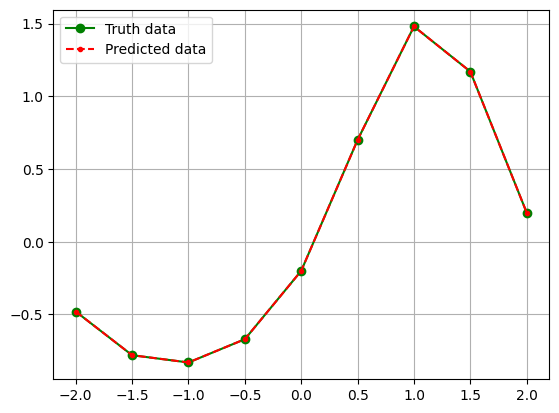

Mean Square Error = 3.344238466398666e-14


In [49]:
cs = [-3.0, -2.8, -2.3, -1.9, -1.4, -0.8, -0.5, 0.0, 0.5, 0.8, 1.4, 1.9, 2.3, 2.8, 3.0]
perceptron = PerceptronRBF.Percept(cs=cs)
perceptron.transform_fit(X, y, is_singular=True)
s_core_g2 = perceptron.core_g
y_singular_predicted2 = [perceptron.predict(x) for x in X]  # doing predicting
plt.plot(X, y, "go-")
plt.plot(X, y_singular_predicted2, "r.--")
plt.grid(visible=True)
plt.legend(["Truth data", "Predicted data"])
plt.show()
print("Mean Square Error =", perceptron.mse_score)

In [50]:
np.abs(core_g2) - np.abs(s_core_g2)

array([[ 2.58161351e+04,  1.57243385e+04,  8.22221285e+03,
         1.26377776e+03,  1.54494613e+03,  1.51055986e+04,
         2.48825677e+04,  4.62116250e+04,  6.29571158e+04],
       [ 3.89922905e+04,  2.36699684e+04,  1.25481715e+04,
         2.65557539e+03,  3.31439353e+03,  2.31051504e+04,
         3.82086500e+04,  7.04200139e+04,  9.67929057e+04],
       [ 2.54398547e+04,  1.49972456e+04,  6.95317901e+03,
         1.47618268e+03,  3.32663926e+03,  1.47194911e+04,
         2.68118118e+04,  4.88172404e+04,  6.92121768e+04],
       [ 1.51744704e+04,  8.87544909e+03,  3.16043295e+03,
         7.92759322e+02,  3.66192240e+03,  8.82408955e+03,
         1.82563793e+04,  3.24335263e+04,  4.73091929e+04],
       [ 4.56167154e+03,  2.48286059e+03, -1.79122270e+02,
        -2.80273746e+02,  1.98395385e+03,  2.58174599e+03,
         7.27467699e+03,  1.27219842e+04,  1.93031111e+04],
       [ 1.00732792e+03,  2.07473711e+02,  3.59738397e+02,
        -7.95857562e+01,  6.63522835e+02,  7.460552

In [51]:
core_g2

array([[-2.58472770e+04, -1.58577837e+04, -8.51349720e+03,
         1.68549028e+03,  1.98710392e+03,  1.54490699e+04,
         2.50756509e+04,  4.62835510e+04,  6.29707451e+04],
       [ 3.89952363e+04,  2.36949980e+04,  1.26250638e+04,
        -2.79334575e+03, -3.48156941e+03, -2.32494146e+04,
        -3.82963171e+04, -7.04546396e+04, -9.67997628e+04],
       [-2.54741583e+04, -1.51543555e+04, -7.30666148e+03,
         1.99323065e+03,  3.86837925e+03,  1.51376291e+04,
         2.70447565e+04,  4.89031744e+04,  6.92283102e+04],
       [ 1.51789191e+04,  8.90866350e+03,  3.26748673e+03,
        -9.94377200e+02, -3.91555007e+03, -9.04829244e+03,
        -1.83947651e+04, -3.24887282e+04, -4.73201927e+04],
       [-4.58849418e+03, -2.60704836e+03, -1.00331039e+02,
         1.18038578e+02,  2.38242837e+03,  2.87177742e+03,
         7.42614516e+03,  1.27743285e+04,  1.93123494e+04],
       [ 1.02581283e+03,  3.05045315e+02, -6.15855375e+02,
        -3.51232639e+02, -1.16753157e+03, -1.168041

In [52]:
s_core_g2

array([[ 3.11418357e+01, -1.33445204e+02,  2.91284347e+02,
        -4.21712524e+02,  4.42157798e+02, -3.43471336e+02,
         1.93083128e+02, -7.19260463e+01,  1.36293654e+01],
       [-2.94580950e+00,  2.50295507e+01, -7.68923197e+01,
         1.37770358e+02, -1.67175877e+02,  1.44264174e+02,
        -8.76671055e+01,  3.46256682e+01, -6.85706518e+00],
       [-3.43036492e+01,  1.57109937e+02, -3.53482464e+02,
         5.17047977e+02, -5.41739993e+02,  4.18137998e+02,
        -2.32944669e+02,  8.59339554e+01, -1.61334203e+01],
       [ 4.44864139e+00, -3.32144049e+01,  1.07053779e+02,
        -2.01617878e+02,  2.53627669e+02, -2.24202895e+02,
         1.38385878e+02, -5.52019395e+01,  1.09998251e+01],
       [ 2.68226437e+01, -1.24187775e+02,  2.79453308e+02,
        -3.98312324e+02,  3.98474515e+02, -2.90031433e+02,
         1.51468176e+02, -5.23443136e+01,  9.23829682e+00],
       [-1.84849133e+01,  9.75716033e+01, -2.56116977e+02,
         4.30818395e+02, -5.04008732e+02,  4.219862

In [55]:
np.abs(y_predicted2) - np.abs(y_singular_predicted2)

array([ 6.42484721, 15.86493041,  8.41093602, -0.62301936,  2.49813449,
       -0.17469202,  1.17708552,  0.80721487,  0.12196968])

In [56]:
y_predicted2

[6.904847206689448,
 -16.64493041238162,
 9.240936018081126,
 -0.0469806413884552,
 -2.6981344915168677,
 0.5253079801014398,
 2.6570855204482893,
 1.9772148681377928,
 0.32196967826689615]

In [57]:
y_singular_predicted2

[-0.4800000000000524,
 -0.7800000000000199,
 -0.8299999999999738,
 -0.669999999999958,
 -0.19999999999996465,
 0.70000000000001,
 1.4799999999999789,
 1.1699999999999564,
 0.19999999999994955]